In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
df = pd.read_csv("bismillah.csv")
X = df.drop(columns=['harga'])
y = df['harga']

## Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## Preparation (One-Hot Encoder dan Standard Scaler)

In [4]:
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

numerical_features = X.select_dtypes(include=["float64", "int64"]).columns.tolist()

In [5]:
preprocessor = ColumnTransformer(
   transformers=[
       ('cat', OneHotEncoder(), categorical_features),
       ('num', StandardScaler(), numerical_features),
   ]
)

## Pipeline (untuk RandomizedSearchCV)

In [6]:
pipeline_randomized = Pipeline([
       ('preprocessor', preprocessor),
       ('regressor', GradientBoostingRegressor()),
])

## RandomizedSearchCV

In [7]:
param_distributions = {
    'regressor__n_estimators': [1000, 1200, 1400, 1800, 2000],
    'regressor__max_depth': [1, 2, 3, 4],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
}

In [9]:
random_search = RandomizedSearchCV(
    estimator=pipeline_randomized,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=42,
    verbose=10
)

random_search.fit(X_train, y_train)

print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5; 1/50] START regressor__max_depth=1, regressor__min_samples_leaf=2, regressor__min_samples_split=2, regressor__n_estimators=2000
[CV 1/5; 1/50] END regressor__max_depth=1, regressor__min_samples_leaf=2, regressor__min_samples_split=2, regressor__n_estimators=2000;, score=-88303137150042592.000 total time=   1.1s
[CV 2/5; 1/50] START regressor__max_depth=1, regressor__min_samples_leaf=2, regressor__min_samples_split=2, regressor__n_estimators=2000
[CV 2/5; 1/50] END regressor__max_depth=1, regressor__min_samples_leaf=2, regressor__min_samples_split=2, regressor__n_estimators=2000;, score=-63675223315440200.000 total time=   1.5s
[CV 3/5; 1/50] START regressor__max_depth=1, regressor__min_samples_leaf=2, regressor__min_samples_split=2, regressor__n_estimators=2000
[CV 3/5; 1/50] END regressor__max_depth=1, regressor__min_samples_leaf=2, regressor__min_samples_split=2, regressor__n_estimators=2000;, score=-7440747619064

## Model Development

In [15]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=1000, 
                                            min_samples_split=2,
                                            min_samples_leaf=4, 
                                            max_depth=1))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['kecamatan', 'kota']),
                                                 ('num', StandardScaler(),
                                                  ['kamar_tidur', 'kamar_mandi',
                                                   'luas'])])),
                ('regressor',
                 GradientBoostingRegressor(max_depth=1, min_samples_leaf=4,
                                           n_estimators=1000))])

In [16]:
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"MSE: {mse} and RMSE:{rmse}")

MSE: 1.1723633506839266e+17 and RMSE:342397919.1940171


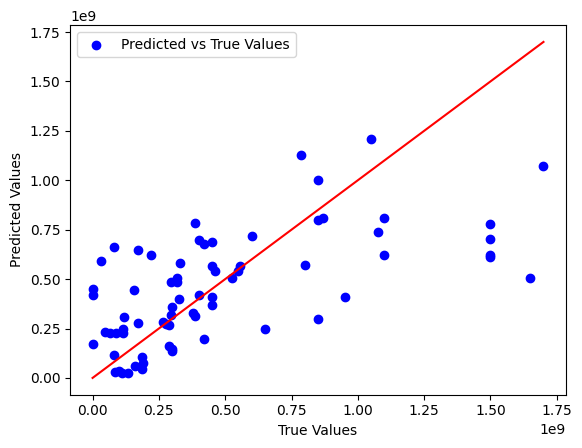

In [17]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line for reference
plt.show()


In [18]:
pipeline.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('cat', OneHotEncoder(), ['kecamatan', 'kota']),
                                   ('num', StandardScaler(),
                                    ['kamar_tidur', 'kamar_mandi', 'luas'])])),
  ('regressor',
   GradientBoostingRegressor(max_depth=1, min_samples_leaf=4, n_estimators=1000))],
 'verbose': False,
 'preprocessor': ColumnTransformer(transformers=[('cat', OneHotEncoder(), ['kecamatan', 'kota']),
                                 ('num', StandardScaler(),
                                  ['kamar_tidur', 'kamar_mandi', 'luas'])]),
 'regressor': GradientBoostingRegressor(max_depth=1, min_samples_leaf=4, n_estimators=1000),
 'preprocessor__n_jobs': None,
 'preprocessor__remainder': 'drop',
 'preprocessor__sparse_threshold': 0.3,
 'preprocessor__transformer_weights': None,
 'preprocessor__transformers': [('cat',
   OneHotEncoder(),
   ['kecamatan', 'kota']),
  ('num', StandardScaler(), ['kamar_tidur', 'k